In [66]:
print(__doc__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Automatically created module for IPython interactive environment


In [47]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data.shape

(3751, 1777)

In [49]:
activity_column = data['Activity']
activity_column.dtype

dtype('int64')

In [50]:
data.groupby('Activity').count()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,,,,,,,,,,,,,,,,,,,,,
0,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,...,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717
1,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,...,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034


In [51]:
np.mean(activity_column == 1)

0.54225539856038385

In [52]:
target = activity_column.values

In [53]:
target[:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [54]:
inputed_features = data.drop('Activity', axis=1)
inputed_features.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [55]:
features_array = inputed_features.values
features_array[:10]

array([[ 0.        ,  0.49700901,  0.1       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36666667,  0.60629148,  0.05      , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0333    ,  0.48012427,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.13333333,  0.61005673,  0.15      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.77681636,  0.05      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1       ,  0.76814957,  0.1       , ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(features_array, target, test_size=0.80, random_state=241)

In [57]:
%matplotlib inline
plt.figure()

      Iter       Train Loss   Remaining Time 
         1           1.0190           55.53s
         2           0.9192           45.38s
         3           0.8272           41.08s
         4           0.7835           38.62s
         5           0.7106           37.49s
         6           0.6362           36.97s
         7           0.5865           36.38s
         8           0.5569           35.79s
         9           0.5231           35.13s
        10           0.4910           34.61s
        20           0.2630           34.13s
        30           0.1670           30.99s
        40           0.1074           28.79s
        50           0.0744           26.89s
        60           0.0465           25.30s
        70           0.0353           24.13s
        80           0.0233           22.92s
        90           0.0164           21.41s
       100           0.0108           19.99s
       200           0.0004            6.37s
Learning_rate: 0.10
Min loss = 0.582 Iteration = 0
   

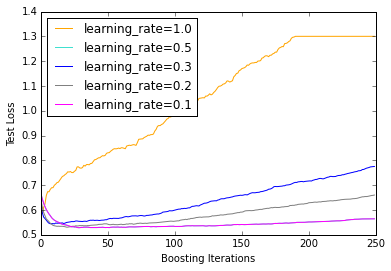

In [65]:
original_params = {'n_estimators': 250, 'verbose': True, 'random_state': 241,
                   'min_samples_split': 5}
for label, color, setting in [('learning_rate=1.0', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.5', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('learning_rate=0.3', 'blue',
                               {'learning_rate': 0.3, 'subsample': 1.0}),
                              ('learning_rate=0.2', 'gray',
                               {'learning_rate': 0.2, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'magenta',
                               {'learning_rate': 0.1, 'subsample': 1.0})]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    test_loss = np.zeros(250)
    for i, y_decision in enumerate(clf.staged_decision_function(X_test)):
        y_predict = 1/(1+np.exp(-y_decision))
        ll = metrics.log_loss(y_test, y_predict)
        test_loss[i] = ll
    print("Learning_rate: %.2f" % (learning_rate))
    print("Min loss = %0.3f Iteration = %d" % (np.min(test_loss), np.argmin(test_loss)))
    plt.plot(test_loss, '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Loss')

plt.show()

In [68]:
clfs = RandomForestClassifier(n_estimators=36, random_state=241)
clfs.fit(X_train, y_train)
pred = clfs.predict_proba(X_test)
metrics.log_loss(y_test, pred)

0.54108992989457405